In [1]:
import logging
import ast
from itertools import product
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.algorithms.search_algorithm import AlgMetrics
from large_gcs.graph.graph import Graph, Vertex, Edge
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import ReexploreLevel
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.cost_estimators.factored_collision_free_ce import FactoredCollisionFreeCE

from large_gcs.contact.contact_regions_set import ContactRegionParams

import numpy as np
from copy import deepcopy
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
logging.getLogger("large_gcs").setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

In [2]:
base_name = "cg_stackpush_a1"

In [4]:
cg_inc = IncrementalContactGraph.load_from_file(
    ContactGraphGeneratorParams.inc_graph_file_path_from_name(base_name),
    should_incl_simul_mode_switches=False,
)

cost_estimator_se = ShortcutEdgeCE(
    cg_inc, contact_shortcut_edge_cost_factory_over_obj_weighted
)
gcs_astar_se = GcsAstarConvexRestriction(
    cg_inc,
    cost_estimator=cost_estimator_se,
    reexplore_level=ReexploreLevel.NONE,
)
sol_se = gcs_astar_se.run()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 55553.70it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 23899.17it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 10 body pairs...
100%|██████████| 10/10 [00:00<00:00, 152.23it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (313)
100%|██████████| 313/313 [00:00<00:00, 5400.65it/s]
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Running GcsAstarConvexRestriction, reexplore_level: ReexploreLevel.NONE
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_expanded: {0: 2}, n_vertices_visited: {0: 0}, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0:

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpuc_6i0nw/temp.m4v


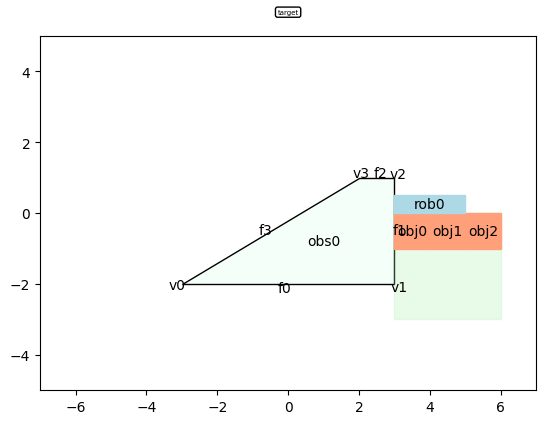

In [5]:
anim = cg_inc.animate_solution()
HTML(anim.to_html5_video())

In [3]:
cg_inc = IncrementalContactGraph.load_from_file(
    ContactGraphGeneratorParams.inc_graph_file_path_from_name(base_name),
    should_incl_simul_mode_switches=False,
)

cost_estimator_se = ShortcutEdgeCE(
    cg_inc, contact_shortcut_edge_cost_factory_over_obj_weighted
)
gcs_astar_se = GcsAstarConvexRestriction(
    cg_inc,
    cost_estimator=cost_estimator_se,
    reexplore_level=ReexploreLevel.NONE,
)
sol_se = gcs_astar_se.run()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 36631.48it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 15307.68it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 6 body pairs...
100%|██████████| 6/6 [00:00<00:00, 176.01it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (184)
100%|██████████| 184/184 [00:00<00:00, 5193.07it/s]
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Running GcsAstarConvexRestriction, reexplore_level: ReexploreLevel.NONE
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_expanded: {0: 2}, n_vertices_visited: {0: 0}, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpupmiztkc/temp.m4v


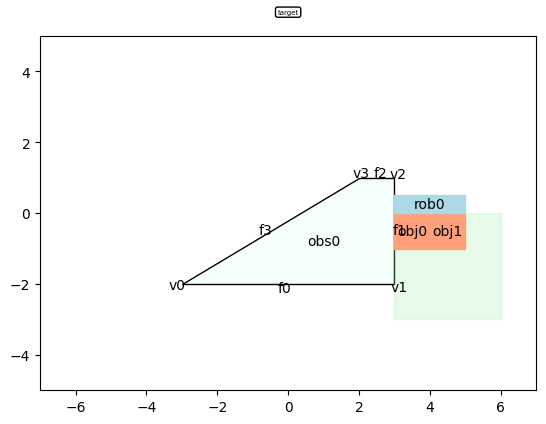

In [4]:
anim = cg_inc.animate_solution()
HTML(anim.to_html5_video())

In [3]:
cg_inc = IncrementalContactGraph.load_from_file(
    ContactGraphGeneratorParams.inc_graph_file_path_from_name(base_name),
    should_incl_simul_mode_switches=False,
)

cost_estimator = FactoredCollisionFreeCE(
    cg_inc, use_combined_gcs=True, obj_multiplier=100
)

gcs_astar = GcsAstarConvexRestriction(
    cg_inc,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...


Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-01


100%|██████████| 2/2 [00:00<00:00, 33554.43it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 9686.61it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 10 body pairs...
100%|██████████| 10/10 [00:00<00:00, 58.11it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (282)
100%|██████████| 282/282 [00:00<00:00, 6667.83it/s]
INFO:large_gcs.graph.factored_collision_free_graph:Creating vertex costs for factored_collision_free_graph...
100%|██████████| 6/6 [00:00<00:00, 6307.22it/s]
INFO:large_gcs.graph.graph:Adding 6 vertices to graph...
100%|██████████| 6/6 [00:00<00:00, 14571.99it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 15/15 [00:00<00:00, 7947.77it/s]
INFO:large_gcs.graph.contact_graph:26 edges generated
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 26/26 [00:00<00:00, 13597.49it/s]
INFO:large_gcs.graph.cont

In [4]:
cg_inc = IncrementalContactGraph.load_from_file(
    ContactGraphGeneratorParams.inc_graph_file_path_from_name(base_name),
    should_incl_simul_mode_switches=True,
)

cost_estimator_se = ShortcutEdgeCE(
    cg_inc, contact_shortcut_edge_cost_factory_over_obj_weighted
)
gcs_astar_se = GcsAstarConvexRestriction(
    cg_inc,
    cost_estimator=cost_estimator_se,
    reexplore_level=ReexploreLevel.NONE,
)
sol_se = gcs_astar_se.run()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 28435.96it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 8905.10it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 10 body pairs...
100%|██████████| 10/10 [00:00<00:00, 40.79it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (282)
100%|██████████| 282/282 [00:00<00:00, 7908.49it/s]
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Running GcsAstarConvexRestriction, reexplore_level: ReexploreLevel.NONE
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.667, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vert

In [ ]:
cg_inc = IncrementalContactGraph.load_from_file(
    ContactGraphGeneratorParams.inc_graph_file_path_from_name(base_name),
    should_incl_simul_mode_switches=True,
)

cost_estimator = FactoredCollisionFreeCE(
    cg_inc, use_combined_gcs=True, obj_multiplier=100
)

gcs_astar = GcsAstarConvexRestriction(
    cg_inc,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 19065.02it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 12905.55it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 6 body pairs...
100%|██████████| 6/6 [00:00<00:00, 54.68it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (162)
100%|██████████| 162/162 [00:00<00:00, 7041.22it/s]
INFO:large_gcs.graph.factored_collision_free_graph:Creating vertex costs for factored_collision_free_graph...
100%|██████████| 6/6 [00:00<00:00, 8861.21it/s]
INFO:large_gcs.graph.graph:Adding 6 vertices to graph...
100%|██████████| 6/6 [00:00<00:00, 15205.94it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 15/15 [00:00<00:00, 17288.97it/s]
INFO:large_gcs.graph.contact_graph:26 edges generated
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 

KeyError: "('NC|obs0_f3-obj0_v1', 'NC|obj0_f1-obj1_f3')"